For reference

Since retirement age is given as a range, in my analysis I replaced each response with 5 entries, one for each year in the range for a boxplot. 
This is how it would look like if I used the median of each range instead.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
data = pd.read_csv('2023cleaned.csv')

def get_median_in_range(age_range):
    if age_range == "71+":
        return 73
    low, high = map(int, age_range.split('-'))
    return (low + high) // 2

data['Children'] = data['Children'].fillna(0)
data['Additional Children'] = data['Additional Children'].fillna(0)
data['Totalchildren'] = data['Children'] + data['Additional Children']
data = data[data['Retire age'] != 'Undecided'].dropna(subset=['Retire age'])
data['Retire age'] = data['Retire age'].apply(get_median_in_range)


Text(0, 0.5, 'Predicted Retirement Age')

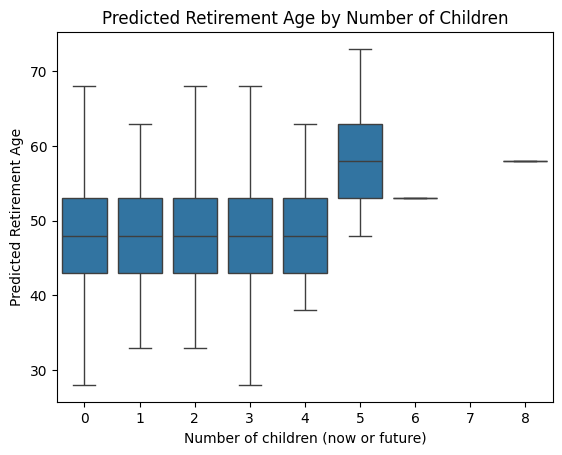

In [12]:
data['Totalchildren'] = data['Totalchildren'].astype(int)

sns.boxplot(x='Totalchildren', y='Retire age', data=data, showfliers=False, order=range(9))
plt.title("Predicted Retirement Age by Number of Children")
plt.xlabel('Number of children (now or future)')
plt.ylabel('Predicted Retirement Age')

The data looks like this:

In [13]:
print(data[['Totalchildren', 'Retire age']].head(20))

    Totalchildren  Retire age
0               0          63
4               0          43
6               2          38
10              3          33
11              2          48
12              2          48
14              2          53
17              3          43
19              0          48
20              1          58
21              0          48
23              0          53
25              0          58
27              2          58
28              2          68
29              2          48
30              0          43
32              2          38
33              5          73
34              0          48


The boxplots pretty much have the same LQ, M and UQ in every case, even though the number of people in each range is different. An example:

[23, 23, 23, 23, 28, 28, 28, 28, 33] -> M 28

[23, 28, 28, 28, 28, 33, 33, 38, 38] -> M 28

But the original data is a range, someone aged 23 here can actually be anywhere from 21 to 25.
So even if the actual data is this, taking the median will report the same for both groups:

[21, 22, 23, 24, 26, 27, 29, 30, 32] -> M 26

[24, 26, 27, 28, 29, 32, 34, 37, 40] -> M 29

On a larger scale, I can assume that for x people reporting their age from 31 to 35, there is probably x/5 people at age 31, x/5 at 32, and so on.

Thus I think taking the second approach makes more sense:

In [14]:
def expand_row(val):
    return list(np.arange(val-2, val+3))

test = pd.DataFrame({
    'median ages': [23, 28, 28],
    'statistics': [1, 2, 3]
})
test['possible age'] = test['median ages'].apply(expand_row)
test = test.explode('possible age')
print(test)
print("New median:", test['possible age'].median())

   median ages  statistics possible age
0           23           1           21
0           23           1           22
0           23           1           23
0           23           1           24
0           23           1           25
1           28           2           26
1           28           2           27
1           28           2           28
1           28           2           29
1           28           2           30
2           28           3           26
2           28           3           27
2           28           3           28
2           28           3           29
2           28           3           30
New median: 27.0


Taking the LQ, M and UQ will report a more accurate estimate of the actual LQ, M, UQ when the dataset is sufficiently large. To some extent this is mixing mean and median.

In [21]:
test2 = pd.DataFrame({
    'median ages': [23, 23, 23, 23, 28, 28, 28, 28, 33]
})
test3 = pd.DataFrame({
    'median ages': [23, 28, 28, 28, 28, 33, 33, 38, 38]
})

test2['possible age'] = test2['median ages'].apply(expand_row)
test2 = test2.explode('possible age')
test3['possible age'] = test3['median ages'].apply(expand_row)
test3 = test3.explode('possible age')
print("Old median:", test2['median ages'].median(), test3['median ages'].median())
print("Mean:", test2['median ages'].mean(), test3['median ages'].mean())
print("New median:", test2['possible age'].median(), test3['possible age'].median())

Old median: 28.0 28.0
Mean: 26.333333333333332 30.77777777777778
New median: 26.0 30.0


Text(0, 0.5, 'Predicted Retirement Age')

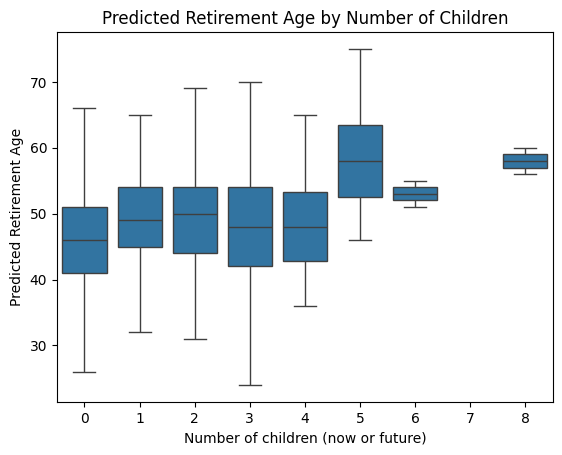

In [16]:
data['alt age'] = data['Retire age'].apply(expand_row)
exploded = data[['Totalchildren', 'alt age']].explode('alt age')

sns.boxplot(x='Totalchildren', y='alt age', data=exploded, showfliers=False, order=range(9))
plt.title("Predicted Retirement Age by Number of Children")
plt.xlabel('Number of children (now or future)')
plt.ylabel('Predicted Retirement Age')